<a href="https://colab.research.google.com/github/Cpt-Shaan/RL-Implementations/blob/main/daily_ohlcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## install finrl library
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-w8e11w07
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-w8e11w07
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 2608e27137810d6803565e473edb81f4c47ae866
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-c2it8e46/elegantrl_15e53894fcc747299b07b3eeff9a7b4c
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-c2it8e46/elegantrl_15e53894fcc747299b07b3eeff9a7b4c
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 8ea76afc3e7f1564ae9f0e69e70254116d575fe9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/1

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=46c603515bf0ce38b8b1aeae1b8d87d8d5d69bc87fea4f2c271030cb0fd02b48
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [ ]:
!pip install pandas_market_calendars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/nifty50-stock-market-data")

print("Path to dataset files:", path)

100%|██████████| 18.4M/18.4M [00:00<00:00, 128MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/nifty50-stock-market-data/versions/15


In [ ]:
import pandas as pd

df = pd.read_csv("../root/.cache/kagglehub/datasets/rohanrao/nifty50-stock-market-data/versions/15/ADANIPORTS.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [ ]:
import pandas_ta as ta

df.rename(columns={'Date':'date','Symbol':'tic','Open':'open','Close':'close','High':'high','Low':'low','Volume':'volume'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['macd'] = ta.macd(df['close']).iloc[:, 0]
df['rsi'] = ta.rsi(df['close'], length=14)
df.dropna(inplace=True)

In [ ]:
df

,date,tic,Series,Prev Close,open,high,low,Last,close,VWAP,volume,Turnover,Trades,Deliverable Volume,%Deliverble,macd,rsi
866,2011-06-01,MUNDRAPORT,EQ,161.45,162.10,165.70,161.25,163.50,164.00,164.08,2574106,4.223703e+13,19171.0,1271255,0.4939,4.967029,71.576291
867,2011-06-02,MUNDRAPORT,EQ,164.00,164.00,165.15,160.15,161.15,161.25,162.17,1699298,2.755678e+13,16176.0,791462,0.4658,5.270570,66.729148
868,2011-06-03,MUNDRAPORT,EQ,161.25,161.50,162.80,159.20,161.00,161.05,161.02,1185817,1.909361e+13,14810.0,722154,0.6090,5.432369,66.377088
869,2011-06-06,MUNDRAPORT,EQ,161.05,160.50,161.10,159.05,160.00,159.85,160.09,546378,8.746905e+12,7071.0,386144,0.7067,5.401500,64.188840
870,2011-06-07,MUNDRAPORT,EQ,159.85,159.85,162.75,156.35,157.00,157.25,158.52,2193466,3.477027e+13,17865.0,1425849,0.6500,5.108353,59.603936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.20,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892,7.641067,49.731946
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.60,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865,7.737472,53.316651
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.40,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203,7.493488,52.679028
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.40,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942,7.256822,52.783873


In [ ]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS
from finrl.config import *
import itertools

In [ ]:
INDICATORS = ['macd', 'rsi']

In [ ]:
train_data = data_split(df, '2012-01-18', '2015-12-31')
test_data = data_split(df, '2017-01-02', '2018-12-31')

In [ ]:
train_data.to_csv('train_data.csv')
test_data.to_csv('trade_data.csv')

In [ ]:
# Modify to reset the index to a default integer index
train_data = train_data.reset_index(drop=True)
# Removed the line that named the index, as we want a default integer index
# train_data.index.names = ['']

In [ ]:
train_data.date

,date
0,2012-01-18
1,2012-01-19
2,2012-01-20
3,2012-01-23
4,2012-01-24
...,...
974,2015-12-23
975,2015-12-24
976,2015-12-28
977,2015-12-29


In [ ]:
train_data

,date,tic,Series,Prev Close,open,high,low,Last,close,VWAP,volume,Turnover,Trades,Deliverable Volume,%Deliverble,macd,rsi
0,2012-01-18,ADANIPORTS,EQ,140.00,142.00,143.80,138.70,143.00,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547,2.604146,63.927409
1,2012-01-19,ADANIPORTS,EQ,141.70,144.00,150.55,143.15,149.50,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955,3.681179,69.890712
2,2012-01-20,ADANIPORTS,EQ,149.40,151.90,157.60,150.25,155.40,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270,4.961689,73.558771
3,2012-01-23,ADANIPORTS,EQ,155.40,155.40,155.40,145.10,146.40,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951,5.218366,61.858752
4,2012-01-24,ADANIPORTS,EQ,146.75,147.05,152.90,145.60,149.80,150.05,150.29,1337362,2.009899e+13,15441.0,703939,0.5264,5.623246,64.198332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2015-12-23,ADANIPORTS,EQ,257.60,259.00,260.25,255.85,256.40,257.30,257.87,1924064,4.961665e+13,19757.0,704118,0.3660,-5.736353,43.895764
975,2015-12-24,ADANIPORTS,EQ,257.30,257.20,261.30,254.45,257.80,258.10,257.77,1660435,4.280176e+13,18039.0,446633,0.2690,-5.182205,44.880377
976,2015-12-28,ADANIPORTS,EQ,258.10,259.00,263.00,257.10,261.90,262.00,260.75,2392484,6.238332e+13,24704.0,1261322,0.5272,-4.377877,49.530437
977,2015-12-29,ADANIPORTS,EQ,262.00,263.30,266.40,261.70,263.40,263.55,264.11,1721015,4.545409e+13,30215.0,568064,0.3301,-3.574168,51.289286


In [ ]:
stock_dimension = len(train_data.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 1, State Space: 5


In [ ]:
from stable_baselines3.common.logger import configure

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": ['macd', 'rsi'], # Explicitly set the indicators present in the dataframe
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

e_train_gym = StockTradingEnv(df = train_data, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env = env_train)

# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [ ]:
RESULTS_DIR

'results'

In [ ]:
agent = DRLAgent(env = env_train)
model_ppo = agent.get_model("ppo")

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device
Logging to results/ppo


In [ ]:
import statistics

In [ ]:
trained_ppo = agent.train_model(model=model_ppo, tb_log_name = 'results/ppo',
                             total_timesteps=50000) if if_using_ppo else None

------------------------------------
| time/              |             |
|    fps             | 1139        |
|    iterations      | 1           |
|    time_elapsed    | 1           |
|    total_timesteps | 2048        |
| train/             |             |
|    reward          | 0.617488    |
|    reward_max      | 13.574623   |
|    reward_mean     | 0.019473383 |
|    reward_min      | -14.27569   |
------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 886          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0027135913 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -0.0168      |
|    learning_rate        | 0.00025     

In [ ]:
trained_ppo.save(TRAINED_MODEL_DIR + "/agent_ppo") if if_using_ppo else None

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path 'trained_models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


Testing part

In [ ]:
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

trained_ppo = PPO.load(TRAINED_MODEL_DIR + "/agent_ppo") if if_using_ppo else None

In [ ]:
e_trade_gym = StockTradingEnv(df = test_data, **env_kwargs)

In [ ]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


In [ ]:
df_account_value_ppo

,date,account_value
0,2017-01-02,1.000000e+06
1,2017-01-03,9.999895e+05
2,2017-01-04,1.000128e+06
3,2017-01-05,1.003317e+06
4,2017-01-06,1.002800e+06
...,...,...
488,2018-12-21,1.216037e+06
489,2018-12-24,1.216037e+06
490,2018-12-26,1.268057e+06
491,2018-12-27,1.293141e+06


In [ ]:
# Financial metrics
df_account_value_ppo['date'] = pd.to_datetime(df_account_value_ppo['date'])
df_account_value_ppo['date'] = df_account_value_ppo['date'].dt.tz_localize(None)

# Calculate returns
initial_val = 1000000
final_val = df_account_value_ppo['account_value'].iloc[-1]
total_return = (final_val - initial_val) / initial_val * 100

print("PPO Performance:")
print(f" - Initial Capital: ₹{initial_val:,.2f}")
print(f" - Final Equity: ₹{final_val:,.2f}")
print(f" - Total Return: {total_return:.2f}%")

PPO Performance:
 - Initial Capital: ₹1,000,000.00
 - Final Equity: ₹1,304,588.76
 - Total Return: 30.46%


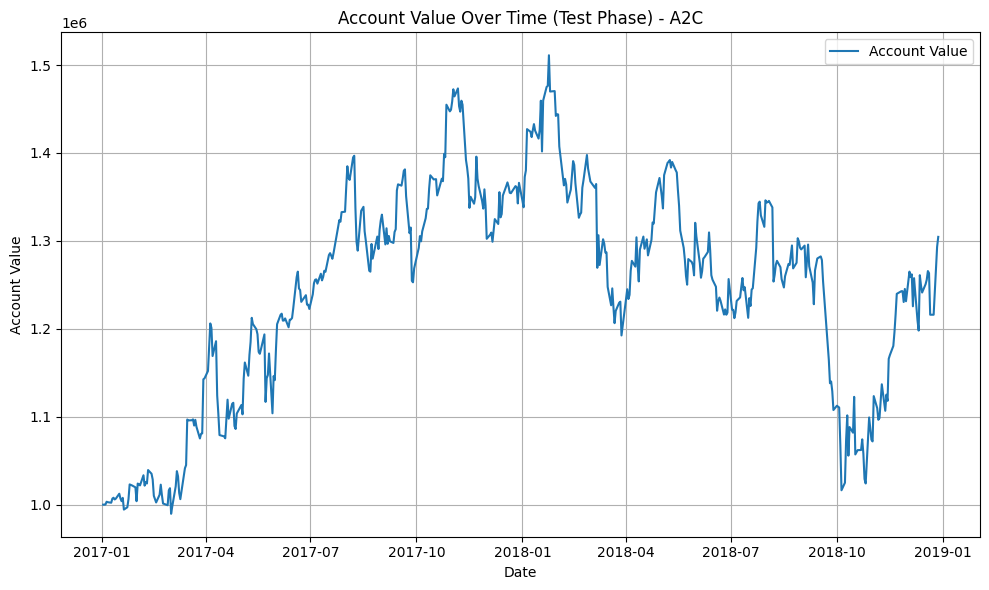

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure your DataFrame has columns 'date' and 'account_value'
plt.figure(figsize=(10, 6))
plt.plot(df_account_value_ppo['date'], df_account_value_ppo['account_value'], label='Account Value')
plt.xlabel('Date')
plt.ylabel('Account Value')
plt.title('Account Value Over Time (Test Phase) - PPO')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()